In [2]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

import pandas as pd
import numpy as np
import shap

from sklearn.metrics import classification_report

In [3]:
X_train = pd.read_csv('train_trans.csv')
y_train = X_train['FLAG']
X_val = pd.read_csv('val_trans.csv')
y_val = X_val['FLAG']
X_test = pd.read_csv('test_trans.csv')
y_test = X_test['FLAG']

In [4]:
X_train.drop(columns=['Unnamed: 0','FLAG'], inplace = True) # drop the first two columns
X_val.drop(columns=['Unnamed: 0','FLAG'], inplace = True)
X_test.drop(columns=['Unnamed: 0','FLAG'], inplace = True)

In [5]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [6]:
train_pred = lr.predict(X_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6205
           1       0.96      0.92      0.94      1765

    accuracy                           0.97      7970
   macro avg       0.97      0.95      0.96      7970
weighted avg       0.97      0.97      0.97      7970



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


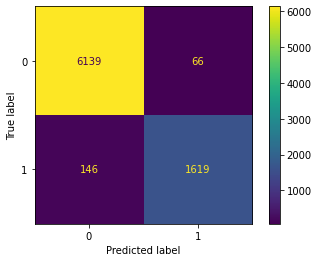

In [9]:
plot_confusion_matrix(lr, X_train, y_train) #Plotting  classification_report(y_train,train_pred)

In [7]:
val_pred = lr.predict(X_val)
print(classification_report(y_val,val_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       690
           1       0.94      0.92      0.93       196

    accuracy                           0.97       886
   macro avg       0.96      0.95      0.96       886
weighted avg       0.97      0.97      0.97       886



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


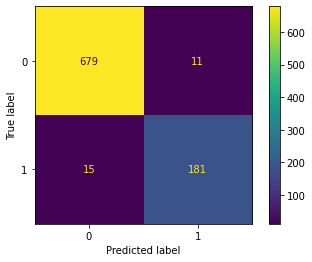

In [11]:
plot_confusion_matrix(lr, X_val, y_val) #Plotting  classification_report(y_train,train_pred)

In [8]:
test_pred = lr.predict(X_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       767
           1       0.96      0.91      0.93       218

    accuracy                           0.97       985
   macro avg       0.97      0.95      0.96       985
weighted avg       0.97      0.97      0.97       985



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


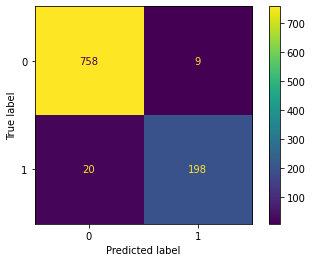

In [12]:
plot_confusion_matrix(lr, X_test, y_test) #Plotting  classification_report(y_train,train_pred)

Permutation explainer: 7971it [03:50, 33.53it/s]                          


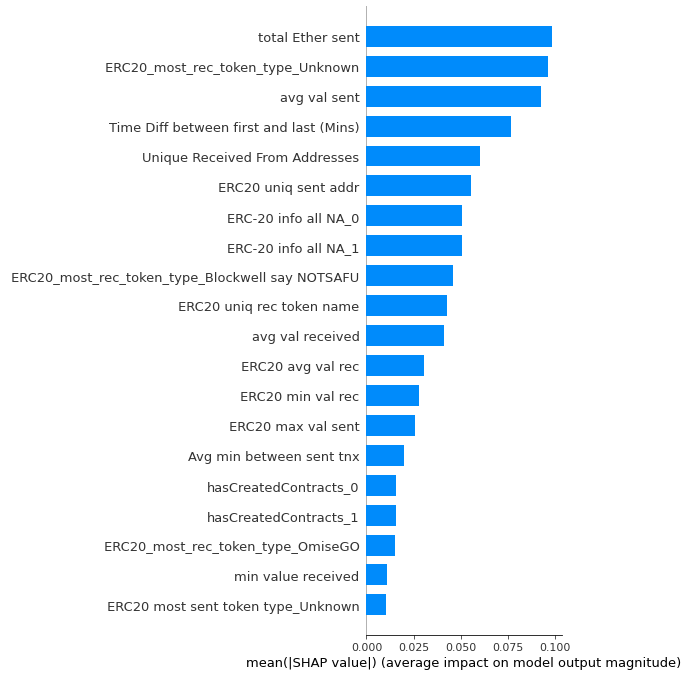

In [10]:
explainer = shap.Explainer(lr.predict,X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar')